<a href="https://colab.research.google.com/github/tracedence/deep-learning-vision/blob/main/cifar100_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

## Data loading

In [2]:
batch_size = 128
trainset = torchvision.datasets.CIFAR100(root='./data', download=True, train=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR100(root='./data', download=True, train=False, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

100%|██████████| 169001437/169001437 [00:02<00:00, 69174161.36it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
for i, data in enumerate(trainloader):
  # print(data)
  inputs, label = data
  print(inputs.shape)
  break

torch.Size([128, 3, 32, 32])


## Model

In [37]:

class LeNet(nn.Module):

  def __init__(self,):
    super().__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),  #(N, 3, 32, 32) --> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2), #(N, 6, 28, 28) --> (N, 6, 14, 14)

        nn.Conv2d(6, 16, 5),  #(N, 6, 14, 14) --> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2), #(N, 16, 10, 10) --> (N, 16, 5, 5)
    )

    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 100)
    )

  def forward(self,x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x


In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [39]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

## training

In [44]:
max_epoches = 5
epoch_loss = []
for epoch in range(max_epoches):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net.forward(inputs)
    loss = loss_fn(outputs, labels)
    opt.zero_grad()
    loss.backward()
    opt.step()
    epoch_loss.append(loss.item())

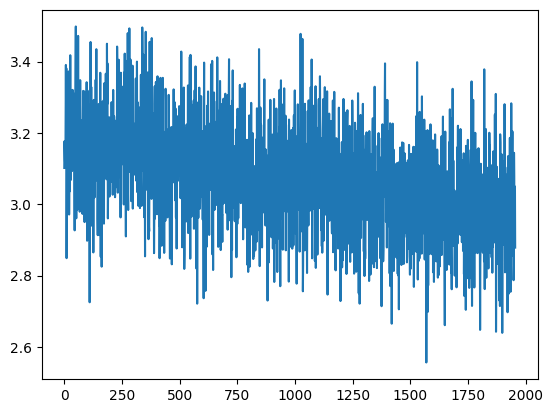

In [45]:
import matplotlib.pyplot as plt
plt.plot(epoch_loss)
plt.show()

## evaluation

In [50]:
def evaluation(testloader, net):
  total, correct = 0, 0
  for i, data in enumerate(testloader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net.forward(inputs)
    _, pred = torch.max(outputs.detach(), 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total



In [51]:
evaluation(testloader, net)

23.74

In [52]:
evaluation(trainloader, net)

27.49